In [2]:
!pip install pandas

In [3]:
import pandas as pd
import numpy as np

## Discriptive Analytics for Numerical Columns -

1. Load data set into analysis tool

2. Identify numerical columns in the dataset

3. Calculate mean,mode,median and standard deviation for these columns

4. Provide brief interpretation of these statistics


## Data Visualization -

#### 1-Box-Plot

1. Create boxplots for numerical variables to identify outlier and interquartile range and discuss any finding such as extreme values or unusual disributions

#### 2-Histogram
1. Plot histogram for each numerical column

#### 3-Bar Chart Analysis for Categorial Column
1. Identify Categorical columns in the dataset
2. Create bar-charts to visualise the frequency or count of each category
3. Analyse distribution of categories and provide insights

## Standardization of Numerical Variables -


1. Explain the concept of standardization (z-score normalization).
2. Standardize numerical columns using the formula z=x-mu/sigma
3. Show before and after comparisons of data distributions 


## Conversion of Categorical Data into Dummy Variables -

1. Discuss the need converting categorical data into dummy variables (one-hot encoding).
2. Aply one-hot  encoding to categorical columns , creating binary columns for each category
3. Display a portion of the transformed dataset.

In [4]:
df=pd.read_csv('sales_data_with_discounts.csv')

In [5]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print(numerical_columns)


['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [6]:
numerical_columns = df.select_dtypes(include=['number']).columns

summary_statistics = pd.DataFrame(index=['mean', 'median', 'mode', 'std'])
for column in numerical_columns:
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  
    std=df[column].std()

In [7]:
mean,median,mode,std

(30466.336131270138, 4677.788059301853, 326.97480055470817, 46358.656624066934)

4. Provide brief interpretation of these statistics

Here's a brief interpretation of the mean, mode, and median statistics:

1) Mean: The mean is the average of a set of numbers. It is calculated by adding up all the numbers and then dividing by the total count of numbers. The mean is sensitive to outliers and can be skewed by extreme values. It represents the central tendency of the data.


2) Mode: The mode is the value that appears most frequently in a set of numbers. It is the value that occurs with the highest frequency. Unlike the mean and median, the mode can be used for both numerical and categorical data. If a dataset has multiple modes, it is called multimodal.


3) Median: The median is the middle value in a set of numbers when they are arranged in order. If there is an odd number of data points, the median is the middle value. If there is an even number of data points, the median is the average of the two middle values. The median is less affected by outliers than the mean and is a measure of the central tendency that is robust to extreme values.

## Data Visualization:

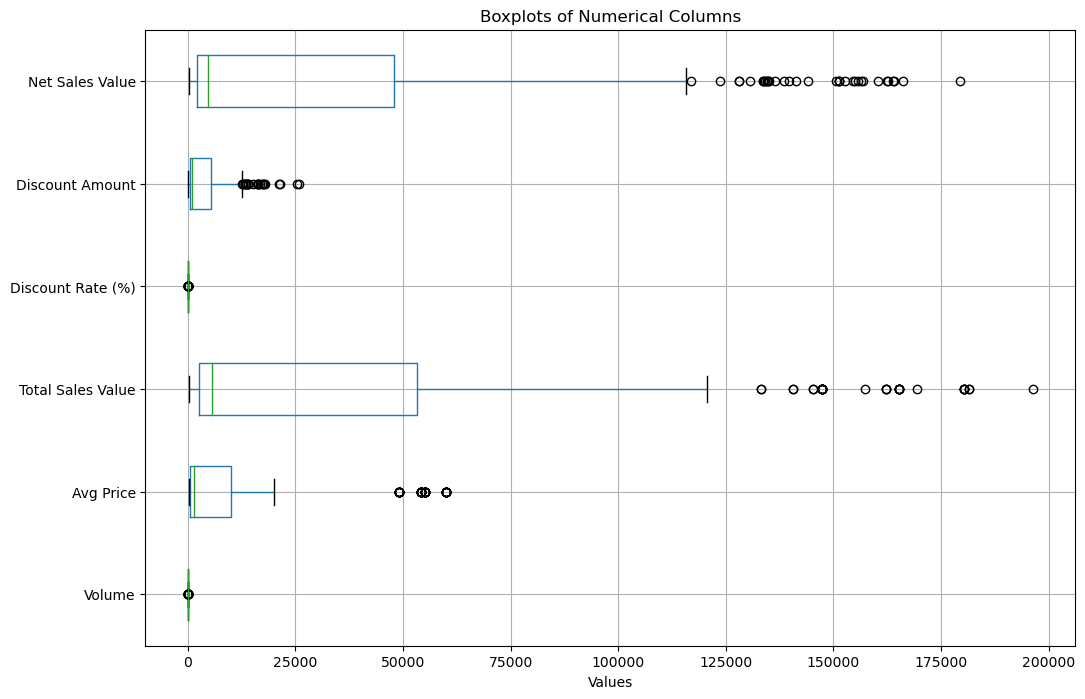

In [8]:
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot(vert=False)
plt.title('Boxplots of Numerical Columns')
plt.xlabel('Values')
plt.show()


### 2-Histogram

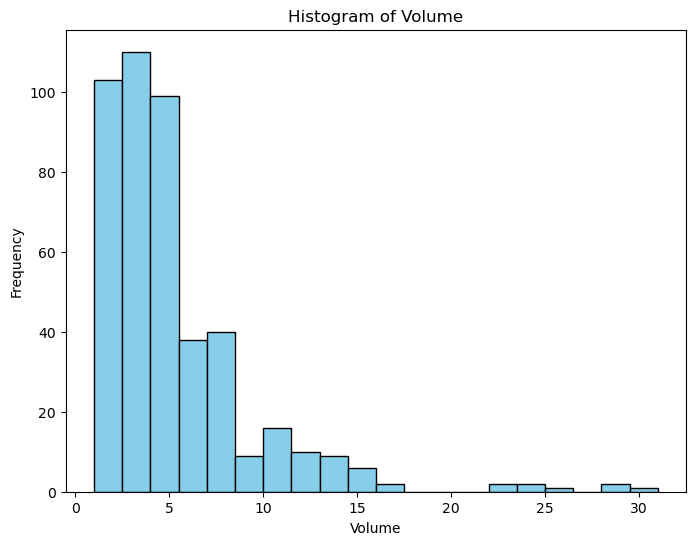

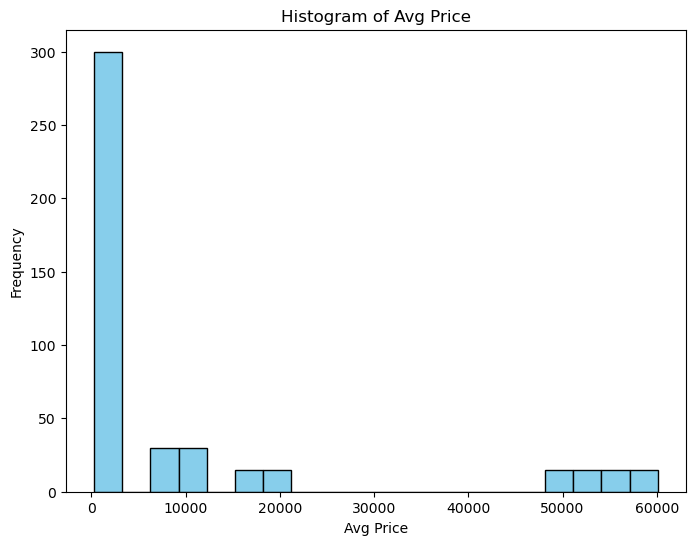

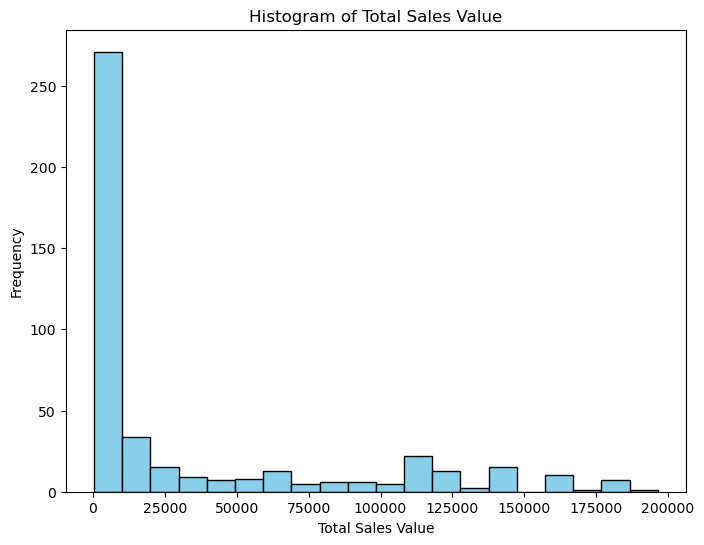

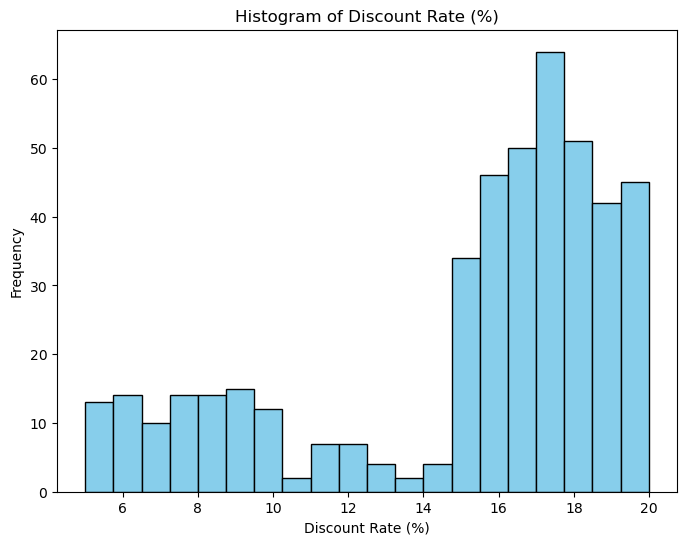

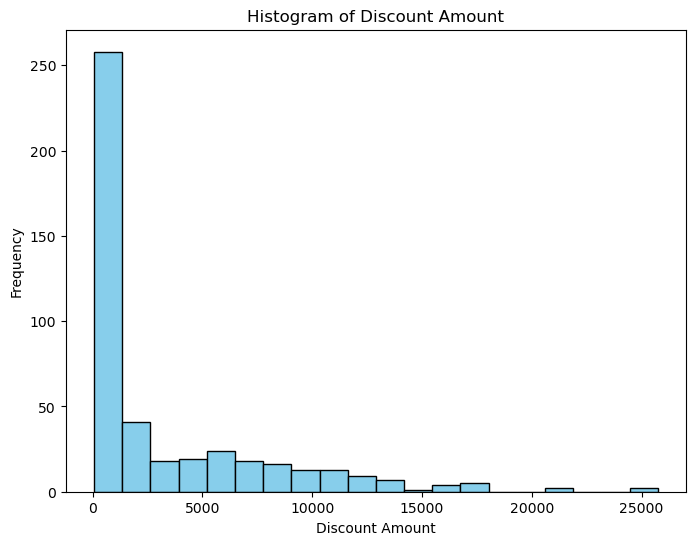

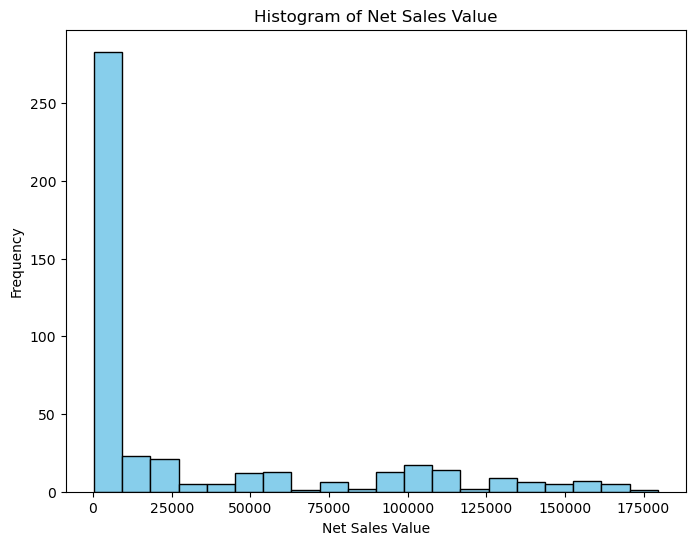

In [9]:
numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

2. Analyse distribution and provide interferance

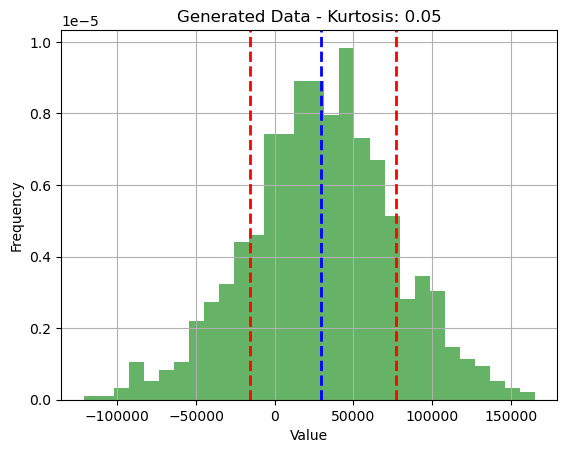

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

mean = 30466.336131270138
std_dev = 46358.656624066934

data = np.random.normal(mean, std_dev, 1000)

# Calculate the kurtosis of the generated data
data_kurtosis = kurtosis(data)

# Plotting the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Adding a vertical line for the mean
plt.axvline(data.mean(), color='b', linestyle='dashed', linewidth=2)

# Adding a vertical line for ±1 standard deviation
plt.axvline(mean + std_dev, color='r', linestyle='dashed', linewidth=2)
plt.axvline(mean - std_dev, color='r', linestyle='dashed', linewidth=2)

plt.title(f"Generated Data - Kurtosis: {data_kurtosis:.2f}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### 3-Bar Chart Analysis for Categorial Column

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print(categorical_columns)

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


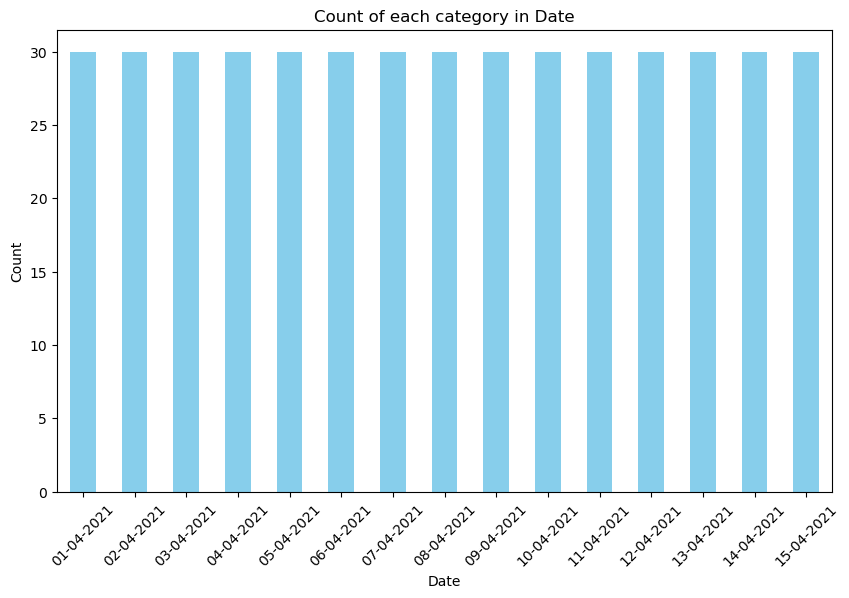

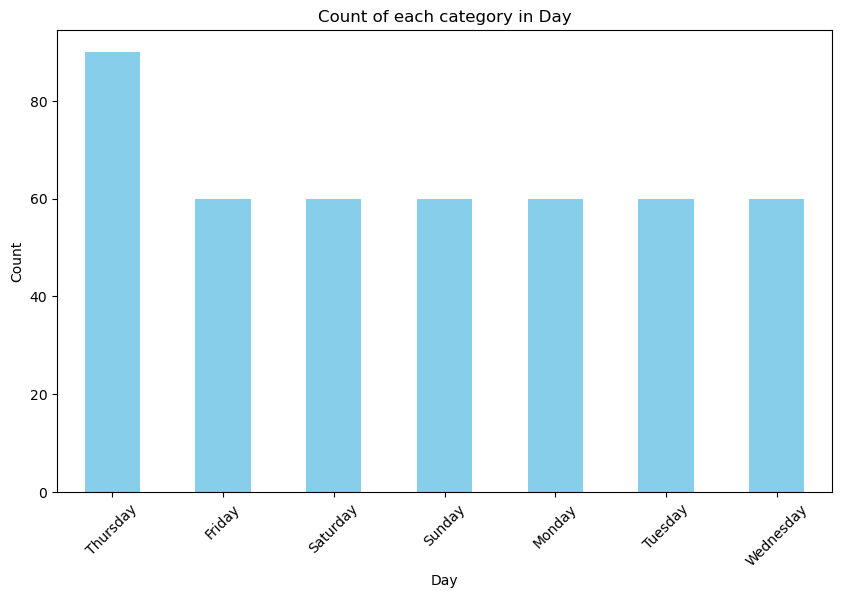

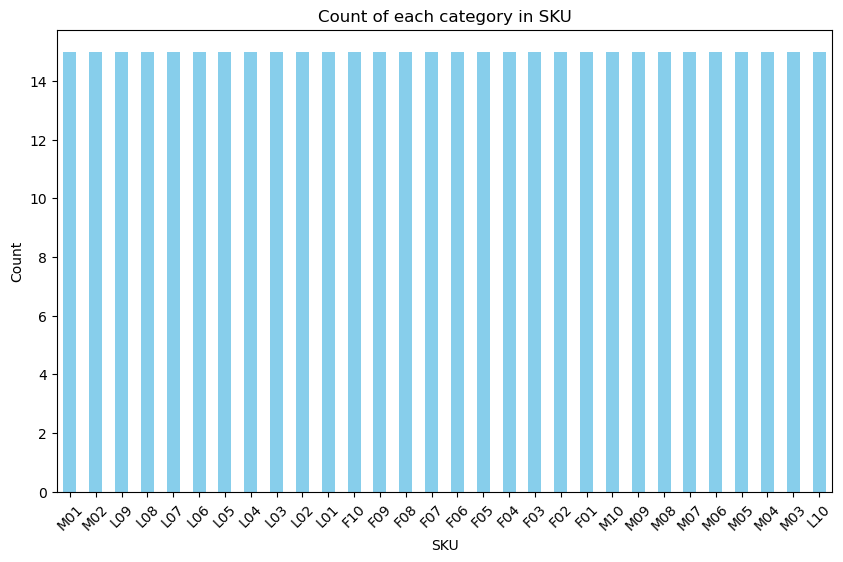

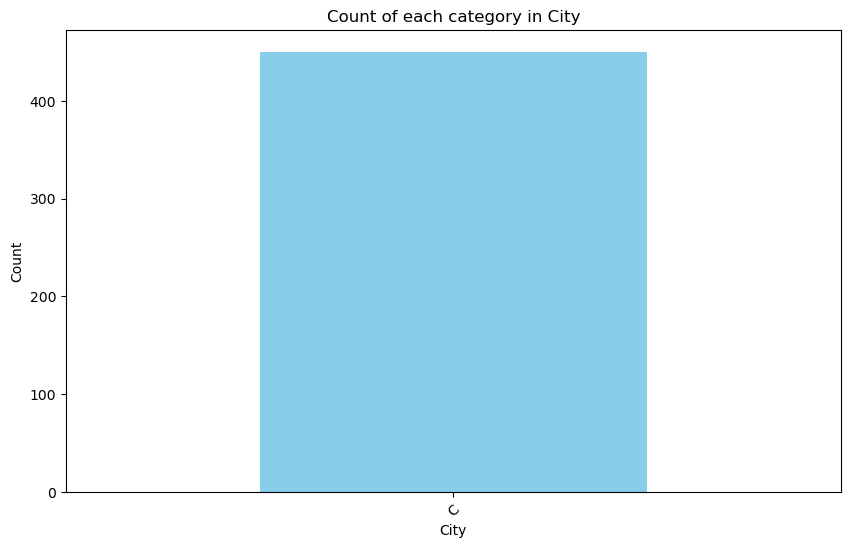

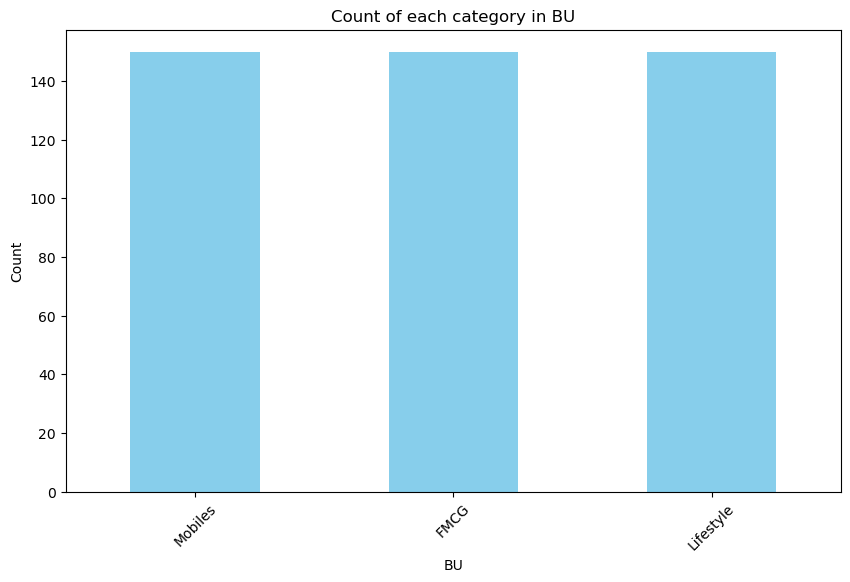

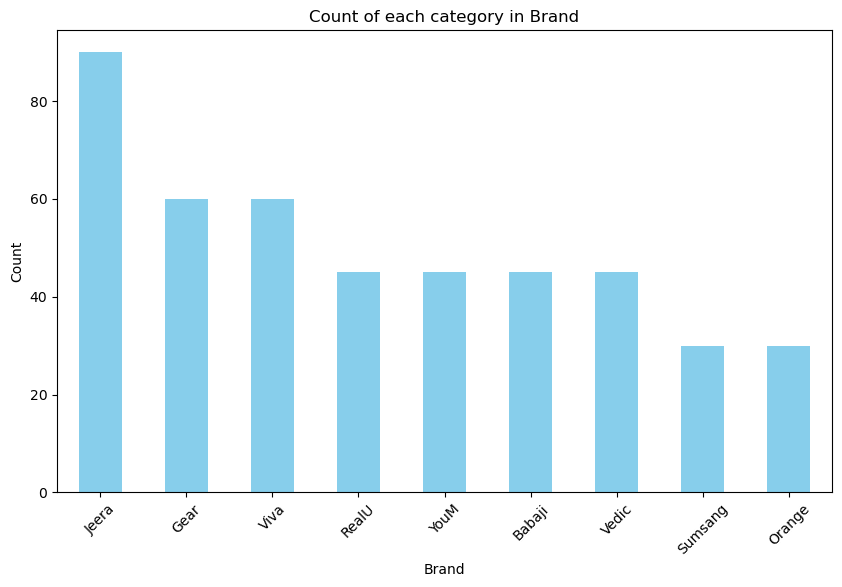

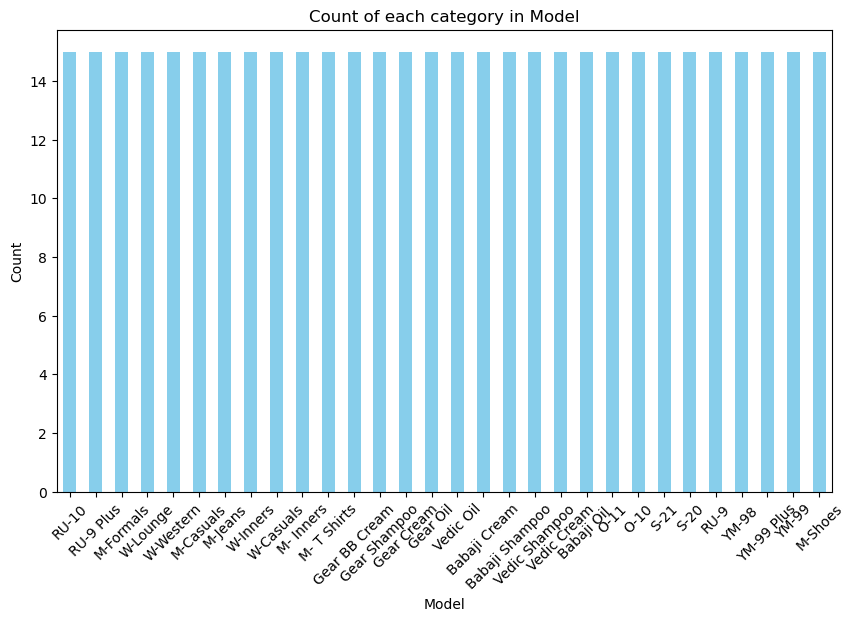

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Create bar charts for each categorical column
for column in categorical_columns:
    
    category_counts = df[column].value_counts()
    
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count of each category in {column}')
    plt.xticks(rotation=45)
    plt.show()


In [90]:
import pandas as pd

categorical_columns = df.select_dtypes(include=['object']).columns

# Analyze the distribution of categories in each categorical column
for column in categorical_columns:
    print(f"Column: {column}")
    print("-" * 20)
    
    # Get value counts for each category
    category_counts = df[column].value_counts()
    
    # Calculate the percentage of each category
    total_samples = len(df)
    category_percentages = (category_counts / total_samples) * 100
    
    # Print insights
    print(f"Total categories: {len(category_counts)}")
    print(f"Most frequent category: {category_counts.idxmax()} ({category_counts.max()} occurrences, {category_percentages.max():.2f}% of total)")
    print(f"Least frequent category: {category_counts.idxmin()} ({category_counts.min()} occurrences, {category_percentages.min():.2f}% of total)")
    print("\n")


Column: Date
--------------------
Total categories: 15
Most frequent category: 01-04-2021 (30 occurrences, 6.67% of total)
Least frequent category: 01-04-2021 (30 occurrences, 6.67% of total)


Column: Day
--------------------
Total categories: 7
Most frequent category: Thursday (90 occurrences, 20.00% of total)
Least frequent category: Friday (60 occurrences, 13.33% of total)


Column: SKU
--------------------
Total categories: 30
Most frequent category: M01 (15 occurrences, 3.33% of total)
Least frequent category: M01 (15 occurrences, 3.33% of total)


Column: City
--------------------
Total categories: 1
Most frequent category: C (450 occurrences, 100.00% of total)
Least frequent category: C (450 occurrences, 100.00% of total)


Column: BU
--------------------
Total categories: 3
Most frequent category: Mobiles (150 occurrences, 33.33% of total)
Least frequent category: Mobiles (150 occurrences, 33.33% of total)


Column: Brand
--------------------
Total categories: 9
Most frequent 

## Standardization of Numerical Variables

Standardization, also known as z-score normalization, is a technique used in statistics and data analysis to transform data into a standard format with a mean of 0 and a standard deviation of 1. This transformation is useful when working with data that have different scales or units, as it allows for easier comparison and interpretation of the data.


By standardizing the data, you center the distribution around 0 and express each data point in terms of "standard deviations from the mean". This makes it easier to compare values across different datasets or variables that may have different scales. It also helps in situations where the data distribution is skewed or has outliers, as standardization is less affected by these issues compared to other normalization techniques.

In [13]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Standardize each numerical column
for column in numerical_columns:
    mean = df[column].mean()
    std = df[column].std()
    df[column + '_standardized'] = (df[column] - mean) / std

# Print the first few rows of the DataFrame with standardized columns
print(df.head())


         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  Volume_standardized  Avg Price_standardized  \
0    160346.501180             2.347417                0.091072   


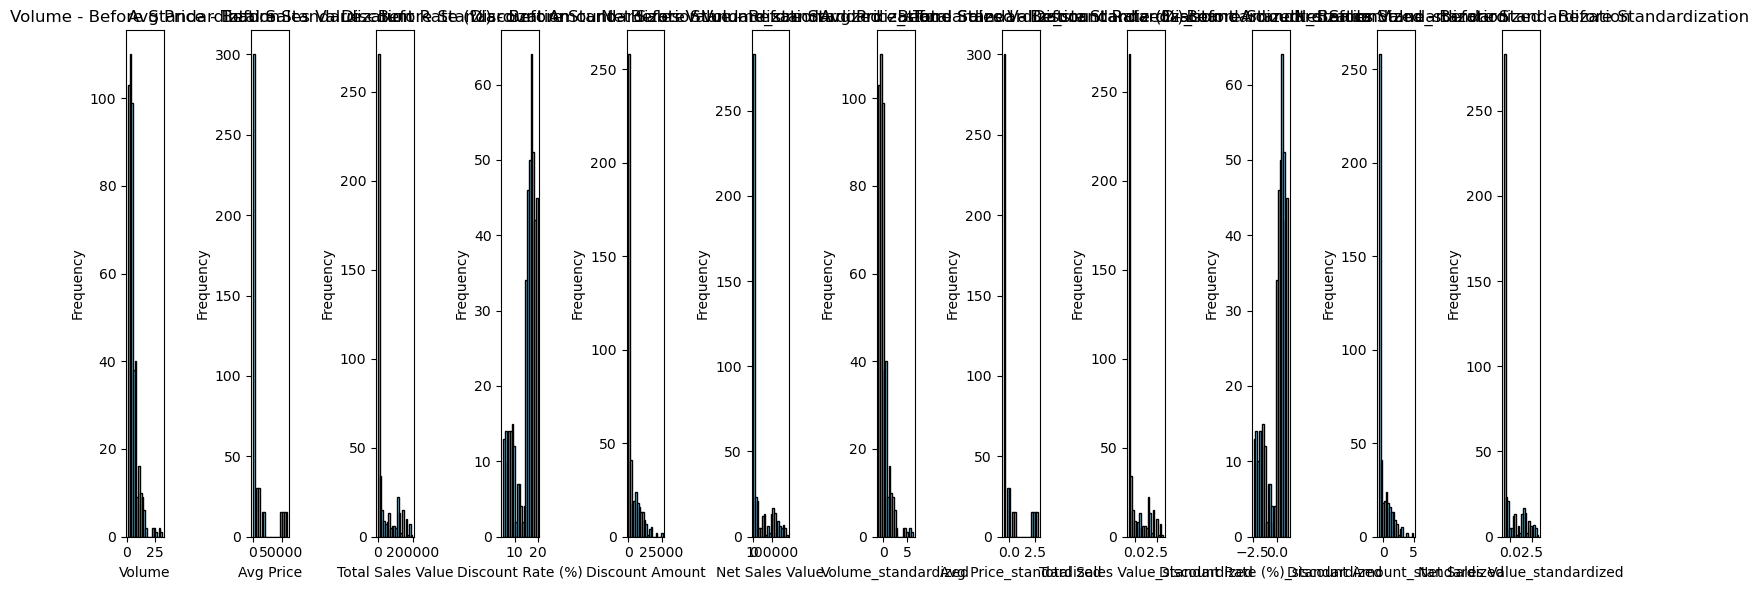

C:\Users\prana\AppData\Local\Temp\ipykernel_4168\3849288044.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


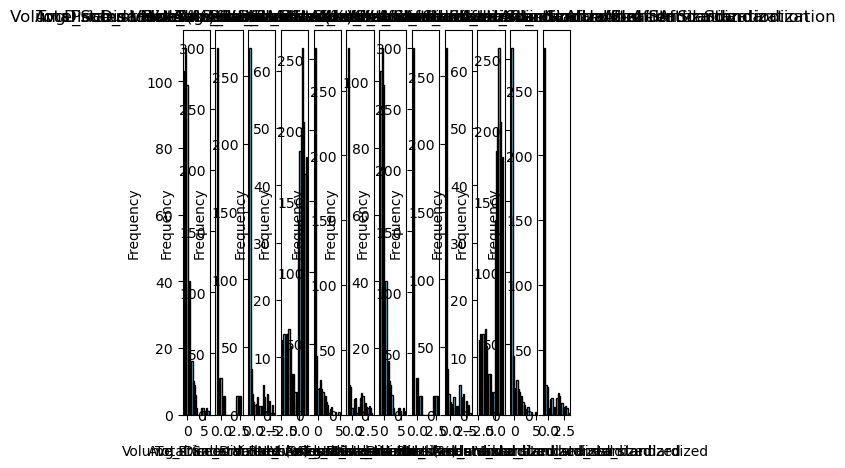

In [14]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Plot histograms of numerical columns before standardization
plt.figure(figsize=(15, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'{column} - Before Standardization')
plt.tight_layout()
plt.show()

# Standardize each numerical column
for column in numerical_columns:
    mean = df[column].mean()
    std = df[column].std()
    df[column + '_standardized'] = (df[column] - mean) / std

# Plot histograms of standardized numerical columns
plt.figure(figsize=(5, 5))
for i, column in enumerate(numerical_columns):
    standardized_column = column + '_standardized'
    plt.subplot(1, len(numerical_columns), i+1)
    plt.hist(df[standardized_column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(standardized_column)
    plt.ylabel('Frequency')
    plt.title(f'{standardized_column} - After Standardization')
plt.tight_layout()
plt.show()


## Conversion of Categorical Data into Dummy Variables


Converting categorical data into dummy variables, also known as one-hot encoding, is necessary for several reasons:

1) Compatibility with Machine Learning Algorithms: Many machine learning algorithms require input data to be numerical. By converting categorical variables into dummy variables, you can represent them as binary values (0 or 1), which allows you to use them as input features for these algorithms.

2) Preserving Ordinal Information: When dealing with categorical variables that have a meaningful order (e.g., "low," "medium," "high"), one-hot encoding preserves this ordinal information by creating binary variables that represent each category.

3) Avoiding Misinterpretation as Numerical Data: If categorical variables are encoded as numerical labels (e.g., 1, 2, 3), some algorithms may interpret these labels as ordinal values and incorrectly assume a meaningful order. One-hot encoding avoids this issue by creating distinct binary variables for each category.

4) Handling Multicollinearity: One-hot encoding helps prevent multicollinearity, which occurs when two or more variables are highly correlated. By representing categorical variables as binary dummy variables, each variable is independent, reducing the risk of multicollinearity in the model.

5) Improving Model Performance: In many cases, one-hot encoding can improve the performance of machine learning models, as it provides more information to the model about the relationships between categorical variables and the target variable.

In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to each categorical column
for column in categorical_columns:
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)], axis=1)
    df.drop(column, axis=1, inplace=True)

# Print the first few rows of the DataFrame with one-hot encoded columns
print(df.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Volume_standardized  Avg Price_standardized  \
0    160346.501180             2.347417                0.091072   
1     89323.897039             1.165831               -0.019548   
2    102042.089843             0.456880                0.312312   
3    112235.925298             0.220563                0.533552   
4     19927.053770            -0.488389               -0.130168   

   Total Sales Value_standardized  Discount Rate (%)_standardized  ...  \
0                        2.922469               

In [16]:
print(df.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Volume_standardized  Avg Price_standardized  \
0    160346.501180             2.347417                0.091072   
1     89323.897039             1.165831               -0.019548   
2    102042.089843             0.456880                0.312312   
3    112235.925298             0.220563                0.533552   
4     19927.053770            -0.488389               -0.130168   

   Total Sales Value_standardized  Discount Rate (%)_standardized  ...  \
0                        2.922469               